# Numerical Simulation Laboratory

## Exercise Sheet 11

### Exercise 11.1
We test the performance of the 1-neuron network given in the exercise sheet, changing the parameters of the network: the number of epochs $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. 

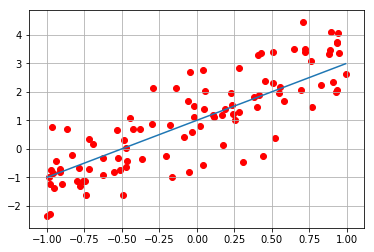

In [1]:
import numpy as np

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [2]:
##### compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1000/1000 [==============================] - 0s 105us/sample - loss: 5.2171 - mean_squared_error: 5.2171 - val_loss: 4.8603 - val_mean_squared_error: 4.8603
Epoch 2/20
1000/1000 [==============================] - 0s 24us/sample - loss: 3.5208 - mean_squared_error: 3.5208 - val_loss: 3.4492 - val_mean_squared_error: 3.4492
Epoch 3/20
1000/1000 [==============================] - 0s 26us/sample - loss: 2.5680 - mean_squared_error: 2.5680 - val_loss: 2.5811 - val_mean_squared_error: 2.5811
Epoch 4/20
1000/1000 [==============================] - 0s 27us/sample - loss: 1.9930 - mean_squared_error: 1.9930 - val_loss: 2.0086 - val_mean_squared_error: 2.0086
Epoch 5/20
1000/1000 [==============================] - 0s 27us/sample - loss: 1.6223 - mean_squared_error: 1.6223 - val_loss: 1.6359 - val_mean_squared_error: 1.6359
Epoch 6/20
1000/1000 [==============================] - 0s 29us/sampl

In [4]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mean square error:', score[1])

100/100 [==============================] - 0s 27us/sample - loss: 0.8286 - mean_squared_error: 0.8286

Test loss: 0.8286302137374878
Test mean square error: 0.8286302


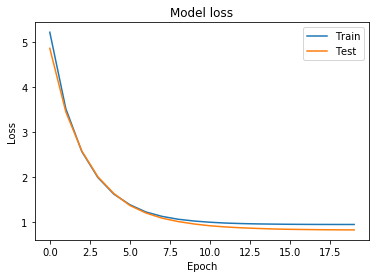

In [5]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

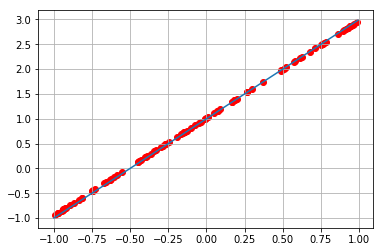

In [6]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

As it appears, the network can work well even with very noisy data, and with relatively few epochs, provided it has a reasonable amount of data for training. 

### Exercise 11.2
We try to extend our neural network to fit a 3rd-order polynomial:

$$
f(x)=4-3x-2x^2+3x^3
$$

We experiment with different network layouts and compare the quality and efficiency of the results.

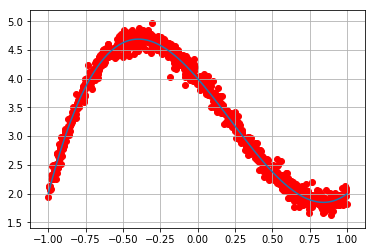

In [24]:
#generate data
import numpy as np

def f(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = f(x_valid)

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [8]:
##### compose the NN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

We start from a very basic network, with a single Relu layer of 5 neurons and a single final neuron, with no activation function, to collect the results and yield the predicted value of $f(x)$.

In [9]:
model1 = tf.keras.Sequential()
model1.add(Dense(5, input_shape=(1,), activation='relu'  ) )
model1.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

history = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid) )

Train on 10000 samples, validate on 1000 samples
Epoch 1/30
10000/10000 [==============================] - 0s 29us/sample - loss: 0.8689 - mean_squared_error: 0.8689 - val_loss: 0.4794 - val_mean_squared_error: 0.4794
Epoch 2/30
10000/10000 [==============================] - 0s 21us/sample - loss: 0.4186 - mean_squared_error: 0.4186 - val_loss: 0.3639 - val_mean_squared_error: 0.3639
Epoch 3/30
10000/10000 [==============================] - 0s 20us/sample - loss: 0.3091 - mean_squared_error: 0.3091 - val_loss: 0.2617 - val_mean_squared_error: 0.2617
Epoch 4/30
10000/10000 [==============================] - 0s 21us/sample - loss: 0.2221 - mean_squared_error: 0.2221 - val_loss: 0.1891 - val_mean_squared_error: 0.1891
Epoch 5/30
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1645 - mean_squared_error: 0.1645 - val_loss: 0.1423 - val_mean_squared_error: 0.1423
Epoch 6/30
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1266 - mean_squared_err

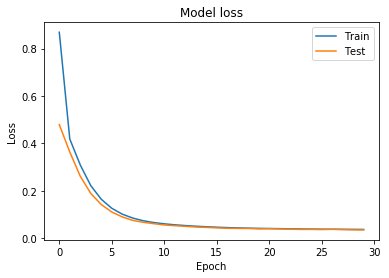

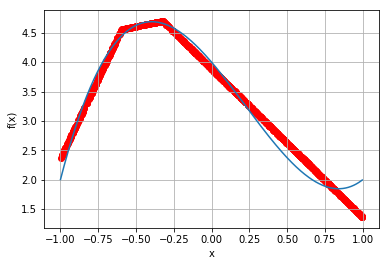

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

The fit is rather poor. A single relu layer appears to not be able to capture the nonlinearity of the function. We switch to an intrinsically nonlinear activation function.

In [11]:
model2 = tf.keras.Sequential()
model2.add(Dense(5, input_shape=(1,), activation='tanh'  ) )
model2.add(Dense(1))

model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

history = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid) )

Train on 10000 samples, validate on 1000 samples
Epoch 1/20
10000/10000 [==============================] - 0s 31us/sample - loss: 0.9643 - mean_squared_error: 0.9643 - val_loss: 0.4406 - val_mean_squared_error: 0.4406
Epoch 2/20
10000/10000 [==============================] - 0s 22us/sample - loss: 0.3961 - mean_squared_error: 0.3961 - val_loss: 0.3579 - val_mean_squared_error: 0.3579
Epoch 3/20
10000/10000 [==============================] - 0s 21us/sample - loss: 0.3135 - mean_squared_error: 0.3135 - val_loss: 0.2769 - val_mean_squared_error: 0.2769
Epoch 4/20
10000/10000 [==============================] - 0s 22us/sample - loss: 0.2402 - mean_squared_error: 0.2402 - val_loss: 0.2067 - val_mean_squared_error: 0.2067
Epoch 5/20
10000/10000 [==============================] - 0s 21us/sample - loss: 0.1737 - mean_squared_error: 0.1737 - val_loss: 0.1444 - val_mean_squared_error: 0.1444
Epoch 6/20
10000/10000 [==============================] - 0s 22us/sample - loss: 0.1187 - mean_squared_err

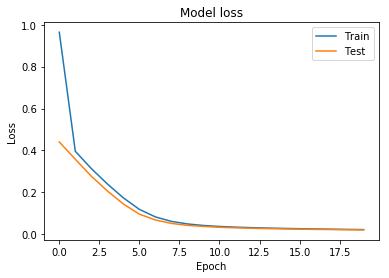

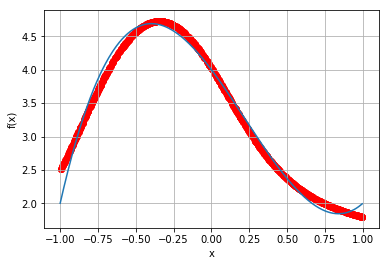

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

Although the quality of the fit is still not great, the tanh activation seems to work in giving the curve a smoother shape.

In [13]:
model3 = tf.keras.Sequential()
model3.add(Dense(5, input_shape=(1,), activation='tanh'  ) )
model3.add(Dense(5, activation='tanh'))
model3.add(Dense(1))

model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

history = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid) )

Train on 10000 samples, validate on 1000 samples
Epoch 1/20
10000/10000 [==============================] - 0s 34us/sample - loss: 0.6342 - mean_squared_error: 0.6342 - val_loss: 0.1829 - val_mean_squared_error: 0.1829
Epoch 2/20
10000/10000 [==============================] - 0s 24us/sample - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.0664 - val_mean_squared_error: 0.0664
Epoch 3/20
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 4/20
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 5/20
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 6/20
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0252 - mean_squared_err

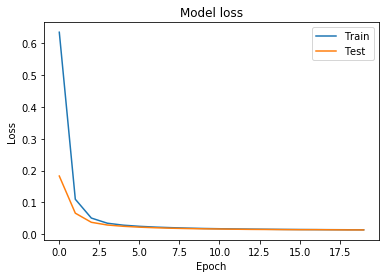

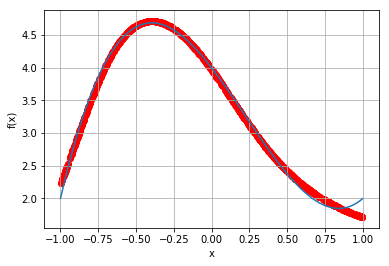

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

At this point, it seems that just adding more tanh layers is a good way to progressively improve the quality of the fit.

In [15]:
model4 = tf.keras.Sequential()
model4.add(Dense(7, input_shape=(1,), activation='tanh'  ) )
model4.add(Dense(7, activation='tanh'))
model4.add(Dense(7, activation='tanh'))
model4.add(Dense(1))

model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

history = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid) )

Train on 10000 samples, validate on 1000 samples
Epoch 1/80
10000/10000 [==============================] - 0s 22us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 2/80
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 3/80
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 4/80
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 5/80
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 6/80
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0133 - mean_squared_err

Epoch 49/80
10000/10000 [==============================] - 0s 37us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 50/80
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 51/80
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 52/80
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 53/80
10000/10000 [==============================] - 0s 26us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 54/80
10000/10000 [==============================] - 0s 45us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0115 - val_mean_sq

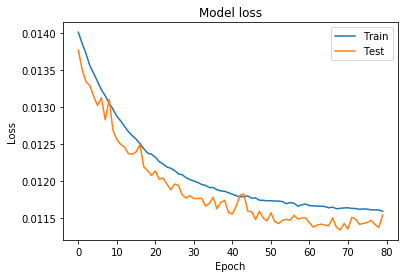

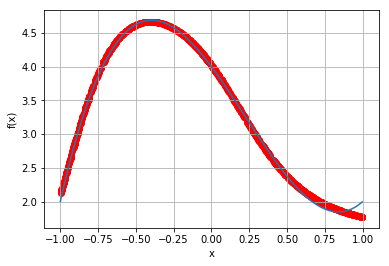

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

As the number of layers increases, the fit keeps getting noticeably better, but the efficiency lowers, not only because each epoch requires more calculations due to the increased number of nodes, but also because the network needs more epochs to fully train. In the example above, the loss is still steadily decreasing after 80 epochs, although it is already much lower than in all other models previously tested.

The final rise of the function just before the end of the explored intervals still proves very hard to model, for reasons we do not understand at all. This is enough to suggest that the model probably won't work very well on points outside of the $x$ interval it has been trained on. We try using the last model for prediction on an extended interval: 

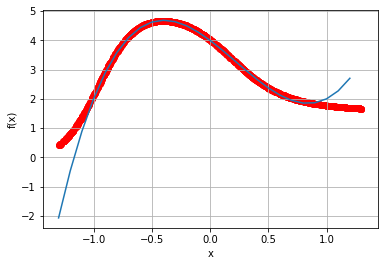

In [31]:
edge = 1.3
x_predicted = np.random.uniform(-edge, edge, 1000)
x_flat = np.arange(-edge, edge, 0.1)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
y_flat = f(x_flat)
plt.plot(x_flat, y_flat)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

As expected, the model has a completely different idea of how the function should look like. Even from a more classical function fitting perspective this is not surprising, because we know that a finite number of points can always be interpolated by different functions that become arbitrarily different when we get farther from the original points, unless we restrict the fitting model to a functional form that is already similar to the one underlying the data. Since our neural network receives no extra information about the true functional form, in this case it becomes impossible for it to generalize.

### Exercise 11.3
We try to use the Neural Network model to fit a more complicated 2D function:

$f(x,y) = \sin(x^2+y^2)$

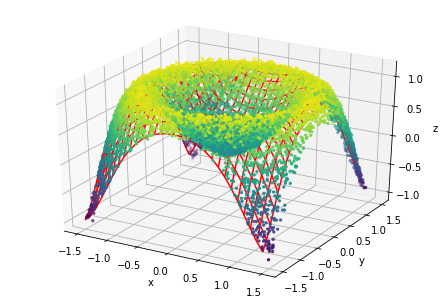

In [3]:
#generate data
import numpy as np

def f(x,y):
    return np.sin( x**2 + y**2)

np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 10000)
x_valid = np.random.uniform(-1.5, 1.5, 1000)
y_train = np.random.uniform(-1.5, 1.5, 10000)
y_valid = np.random.uniform(-1.5, 1.5, 1000)
f_target = f(x_valid,y_valid)
in_valid = np.c_[x_valid, y_valid]
in_train = np.c_[x_train, y_train]

y_range = np.arange(-1.5, 1.5, 0.1)
x_range = np.arange(-1.5, 1.5, 0.1)
x_range, y_range = np.meshgrid(x_range, y_range)
f_range = f(x_range, y_range)


sigma = 0.03 # noise standard deviation, for the moment it is absent
f_train = np.random.normal(f(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
f_valid = np.random.normal(f(x_valid, y_valid), sigma)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_train, y_train, f_train, c=f_train, marker='.')
ax.plot_wireframe(x_range, y_range, f_range, color='red' )
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(10, 30)
plt.show()


# # plot training and target dataset
# plt.plot(x_valid, y_target)
# plt.scatter(x_valid, y_valid, color='r')
# plt.grid(True); plt.show()

In [19]:
##### compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(7, input_shape=(2,), activation='tanh'  ) )
model.add(Dense(7, activation='tanh')   )
model.add(Dense(7, activation='relu')   )
model.add(Dense(7, activation='tanh')   )
model.add(Dense(1 ))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

history = model.fit(x=in_train, y=f_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(in_valid,f_valid) )

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 75us/sample - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 2/100
10000/10000 [==============================] - 1s 56us/sample - loss: 0.1457 - mean_squared_error: 0.1457 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 3/100
10000/10000 [==============================] - 0s 45us/sample - loss: 0.1431 - mean_squared_error: 0.1431 - val_loss: 0.1375 - val_mean_squared_error: 0.1375
Epoch 4/100
10000/10000 [==============================] - 1s 54us/sample - loss: 0.1404 - mean_squared_error: 0.1404 - val_loss: 0.1355 - val_mean_squared_error: 0.1355
Epoch 5/100
10000/10000 [==============================] - 1s 50us/sample - loss: 0.1376 - mean_squared_error: 0.1376 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 6/100
10000/10000 [==============================] - 1s 55us/sample - loss: 0.1346 - mean_squar

Epoch 49/100
10000/10000 [==============================] - 0s 26us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 50/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 51/100
10000/10000 [==============================] - 0s 29us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 52/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 53/100
10000/10000 [==============================] - 0s 29us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 54/100
10000/10000 [==============================] - 0s 27us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0081 - val_m

Epoch 97/100
10000/10000 [==============================] - 0s 30us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 98/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 99/100
10000/10000 [==============================] - 0s 26us/sample - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 100/100
10000/10000 [==============================] - 0s 26us/sample - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


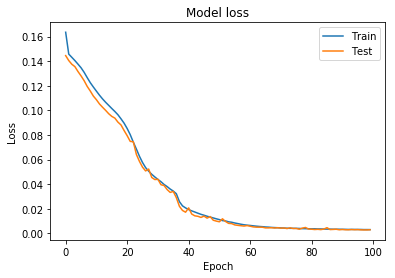

In [20]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

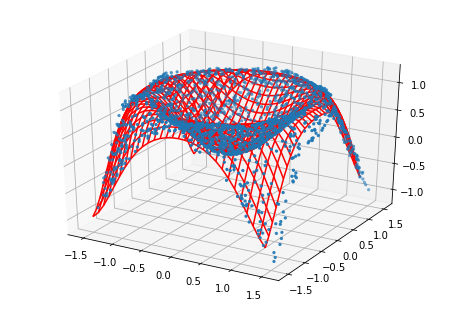

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
npoints = 2000
edge = 1.55
in_predicted = np.c_[np.random.uniform(-edge, edge, npoints), np.random.uniform(-edge, edge, npoints)]
f_predicted = model.predict(in_predicted)
ax.scatter(in_predicted[:,0], in_predicted[:,1], f_predicted, cmap=matplotlib.cm.coolwarm, marker='.')
ax.plot_wireframe(x_range, y_range, f_range, color='red' )
plt.show()

As expected, the problem is considerably harder than before, and it seems that there is little hope of obtaining a reasonably good fit without at least two or three intermediate layers and a good number of epochs.